<a href="https://colab.research.google.com/github/ymuto0302/base1_2021/blob/main/opendata1_jma_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# オープンデータの活用(2)
気象庁データの可視化を **Pandas を用いて**行う。

**狙い：データ解析ライブラリ Pandas は，大量のデータを処理する場合に便利な機能を提供しており，本授業全体を通して利用する。
そこで，前回の「CSVモジュールを用いた気象庁データの可視化」にて取り上げた題材を用いて，Pandas の利用方法に慣れることを目的とする**





---



## 準備：Google Drive のマウント


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pandas とは
Pandas とはデータ解析ライブラリであり，Python プログラムにてデータ解析を容易にする機能を提供する。

Pandas では Seiries と DataFrame の２つのデータ構造が存在するが，利用頻度の高い DataFrame のみを以下で取り扱う。

### DataFrame : 2次元のラベル付きデータ構造
リスト型の値をもつ辞書を DataFrame 関数の引数として渡すことで，データフレームを生成できる。
いわゆる表（テーブル）の形でデータを扱える。

In [52]:
import pandas as pd

# 辞書：キーは "地名"および "人口"，値はリスト型
d = {
    "地名": ["宇部", "山陽小野田", "山口"],
    "人口": [200, 100, 300]
}
df = pd.DataFrame(d)
print(df)

      地名   人口
0     宇部  200
1  山陽小野田  100
2     山口  300


### CSVファイルからのデータ読み込み
以下の内容を格納した CSV ファイルからデータを読み込む。

```
氏名,住所,メールアドレス
宇部太郎,山口県宇部市,taro@ube-k.ac.jp
宇部花子,山口県宇部市,hanako@ube-k.ac.jp
松江一郎,島根県松江市,ichiro@ube-k.ac.jp
鳥取美咲,鳥取県鳥取市,misaki@ube-k.ac.jp
福山雅治,広島県福山市,masaharu@ube-k.ac.jp
```


In [53]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/BASE/OpenData/sample.csv", encoding='utf-8')
print(df)

     氏名      住所               メールアドレス
0  宇部太郎  山口県宇部市      taro@ube-k.ac.jp
1  宇部花子  山口県宇部市    hanako@ube-k.ac.jp
2  松江一郎  島根県松江市    ichiro@ube-k.ac.jp
3  鳥取美咲  鳥取県鳥取市    misaki@ube-k.ac.jp
4  福山雅治  広島県福山市  masaharu@ube-k.ac.jp


### iloc() を用いた値の抽出
値を取り出すには loc() 関数または iloc() 関数を用いる。
- loc()関数：行名または列名を指定し，値を取り出す。
- iloc() 関数：インデックスを指定し，値を取り出す。ここで**インデックスのカウントはゼロから始まる点**に注意が必要である。

以下では幾つかの例を用いて iloc()関数の挙動を確かめてみよう。

In [58]:
# 書式：iloc[行,列]
df.iloc[1,2]

'hanako@ube-k.ac.jp'

In [59]:
# 全ての行について，０列目と２列目を取り出す
df.iloc[:, [0,2]]

,氏名,メールアドレス
0,宇部太郎,taro@ube-k.ac.jp
1,宇部花子,hanako@ube-k.ac.jp
2,松江一郎,ichiro@ube-k.ac.jp
3,鳥取美咲,misaki@ube-k.ac.jp
4,福山雅治,masaharu@ube-k.ac.jp


In [60]:
# １行目と３行目について，全ての列を取り出す
df.iloc[[1,3],:]

,氏名,住所,メールアドレス
1,宇部花子,山口県宇部市,hanako@ube-k.ac.jp
3,鳥取美咲,鳥取県鳥取市,misaki@ube-k.ac.jp


In [61]:
# １〜２行目について，全ての列を取り出す
df.iloc[1:3,:]

,氏名,住所,メールアドレス
1,宇部花子,山口県宇部市,hanako@ube-k.ac.jp
2,松江一郎,島根県松江市,ichiro@ube-k.ac.jp


# ここから本番！

### 気象庁の提供するデータの形式 (CSV)：
```
ダウンロードした時刻：2020/05/30 14:07:33

,京都,京都,京都,京都,京都,京都,京都,京都,京都
年月日,平均気温(℃),平均気温(℃),平均気温(℃),最高気温(℃),最高気温(℃),最高気温(℃),最低気温(℃),最低気温(℃),最低気温(℃)
,,,,,,,,,
,,品質情報,均質番号,,品質情報,均質番号,,品質情報,均質番号
2016/1/1,5.7,8,1,10.6,8,1,2.1,8,1
2016/1/2,6.7,8,1,12.9,8,1,1.8,8,1
2016/1/3,9.3,8,1,15.8,8,1,4.7,8,1
2016/1/4,10.2,8,1,16.0,8,1,5.3,8,1
```

### 気象庁データの読み込み
CSVファイルからのデータ読み込みあたり，以下のオプションを付与する。
- index_col=0 : 最も左の列「年月日」をデータフレームのインデックス列とする
- skip_rows=[0,1,2,4,5] : ヘッダ部から skip_rows で指定した行を読み飛ばす
- encoding='shift_jis' : 気象庁データのエンコードは Shift JIS ゆえ，エンコーディングを指定

In [62]:
import pandas as pd

# CSV ファイルからデータ読み込み
df = pd.read_csv("/content/drive/My Drive/BASE/OpenData/kyoto.csv",
				 index_col=0, # 日付をインデックスとする
				 skiprows=[0,1,2,4,5], # 気色悪いヘッダだから「ヘッダ部をスキップする」形をとる
				 encoding="shift-jis") # 気象庁の提供するデータのエンコードは Shift JIS

In [63]:
# 試しに表示してみる
df

,平均気温(℃),平均気温(℃).1,平均気温(℃).2,最高気温(℃),最高気温(℃).1,最高気温(℃).2,最低気温(℃),最低気温(℃).1,最低気温(℃).2
年月日,,,,,,,,,
2016/1/1,5.7,8,1,10.6,8,1,2.1,8,1
2016/1/2,6.7,8,1,12.9,8,1,1.8,8,1
2016/1/3,9.3,8,1,15.8,8,1,4.7,8,1
2016/1/4,10.2,8,1,16.0,8,1,5.3,8,1
2016/1/5,8.2,8,1,12.2,8,1,4.9,8,1
...,...,...,...,...,...,...,...,...,...
2019/12/27,8.2,8,1,11.5,8,1,3.7,8,1
2019/12/28,5.7,8,1,8.9,8,1,3.2,8,1
2019/12/29,7.4,8,1,12.1,8,1,2.2,8,1


### インデックス列を文字列(str型)から datatime 型へ変換する

In [64]:
# インデックス列の値を datetime フォーマットへ変換
df.index = pd.to_datetime(df.index, format="%Y/%m/%d")

df.head() # 結果確認のため，先頭の５行のみ表示

,平均気温(℃),平均気温(℃).1,平均気温(℃).2,最高気温(℃),最高気温(℃).1,最高気温(℃).2,最低気温(℃),最低気温(℃).1,最低気温(℃).2
年月日,,,,,,,,,
2016-01-01,5.7,8,1,10.6,8,1,2.1,8,1
2016-01-02,6.7,8,1,12.9,8,1,1.8,8,1
2016-01-03,9.3,8,1,15.8,8,1,4.7,8,1
2016-01-04,10.2,8,1,16.0,8,1,5.3,8,1
2016-01-05,8.2,8,1,12.2,8,1,4.9,8,1


### 平均気温・最高気温・最低気温の列のみの取り出し
気象庁のデータには気温に加えて，品質情報・均質番号の列が含まれる。
これらは不要なため，平均気温・最高気温・最低気温の列のみを取り出す

In [65]:
df = df.iloc[:, [0,3,6]]
df.head() # 結果確認のため，先頭の５行のみ表示

,平均気温(℃),最高気温(℃),最低気温(℃)
年月日,,,
2016-01-01,5.7,10.6,2.1
2016-01-02,6.7,12.9,1.8
2016-01-03,9.3,15.8,4.7
2016-01-04,10.2,16.0,5.3
2016-01-05,8.2,12.2,4.9


### 各列のラベルの設定
matplotlib は（デフォルトでは）日本語文字列を使用できないため，列名前「平均気温，最高気温，最低気温」をアルファベット表記は書き換える。

また，インデックス列「年月日」も "Date" へ置き換える。

In [66]:
df.columns = ["heikin", "saikou", "saitei"] # 各列の名前を変更
df.index.name = "Date" # インデックス列の名前を変更
df.head() # 結果確認のため，先頭の５行のみ表示

,heikin,saikou,saitei
Date,,,
2016-01-01,5.7,10.6,2.1
2016-01-02,6.7,12.9,1.8
2016-01-03,9.3,15.8,4.7
2016-01-04,10.2,16.0,5.3
2016-01-05,8.2,12.2,4.9


### Pandas のプロット機能を用いて可視化
データフレームに対して plot() メソッドを適用すると，グラフをプロットできる。

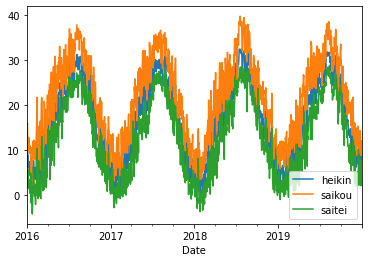

In [67]:
import matplotlib.pyplot as plt

# 折れ線グラフの描画
df.plot()
plt.show()

## 以上をまとめたコード

            heikin  saikou  saitei
Date                              
2016-01-01     5.7    10.6     2.1
2016-01-02     6.7    12.9     1.8
2016-01-03     9.3    15.8     4.7
2016-01-04    10.2    16.0     5.3
2016-01-05     8.2    12.2     4.9
...            ...     ...     ...
2019-12-27     8.2    11.5     3.7
2019-12-28     5.7     8.9     3.2
2019-12-29     7.4    12.1     2.2
2019-12-30     9.7    11.5     7.6
2019-12-31     8.1    12.0     3.8

[1461 rows x 3 columns]


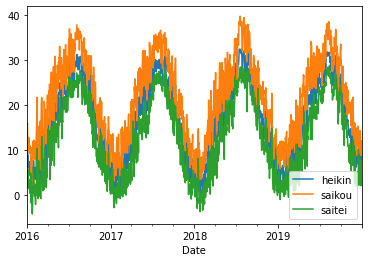

In [68]:
'''
気象庁のデータを用いた可視化
'''
import pandas as pd
import matplotlib.pyplot as plt

# CSV ファイルからデータ読み込み
df = pd.read_csv("/content/drive/My Drive/BASE/OpenData/kyoto.csv",
				 index_col=0, # 日付をインデックスとする
				 skiprows=[0,1,2,3,4], # 気色悪いヘッダだから「ヘッダ部をスキップする」形をとる
				 encoding="shift-jis") # 気象庁の提供するデータのエンコードは Shift JIS

# インデックス列を datetime フォーマットへ変換
df.index = pd.to_datetime(df.index, format="%Y/%m/%d")

# 平均気温，最高気温，最低気温の列のみ取り出す
df = df.iloc[:, [0, 3, 6]]

# 各列のラベルの設定
df.columns = ["heikin", "saikou", "saitei"] # 各列の名前を変更
df.index.name = "Date" # インデックス列の名前を変更
print(df)

# 折れ線グラフの描画
df.plot()
plt.show()

# 課題(その1)
気象庁のサイトから「複数の地点の気温データ」を同時に得ることができる。
以下の指定によってデータを取得し，各地の気温の推移をプロットせよ。
- 地点：宇部市，那覇市，札幌市
- 項目：データの種類は「日別値」，項目は「日平均気温」
- 期間：2019年1月1日〜2020年12月31日

(注)完成イメージは前回の授業で示した。

# 課題(その2)
課題(その1）で使用した「宇部市，那覇市，札幌市の平均気温」データを読み込み，那覇市の気温のみをプロットするよう，コードを書き換えよ。
